In [2]:
import pandas as pd

In [77]:
from __future__ import print_function
from distutils.version import LooseVersion as Version
import sys

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == min_ver:
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(sys.version)
if pyversion >= "3.7":
    print(OK, "Python version is %s" % sys.version)
elif pyversion < "3.7":
    print(FAIL, "Python version 3.7 is required,"
                " but %s is installed." % sys.version)
else:
    print(FAIL, "Unknown Python version: %s" % sys.version)

    
print()
requirements = {'numpy': "1.18.5", 'matplotlib': "3.2.2",'sklearn': "0.23.1", 
                'pandas': "1.0.5",'xgboost': "1.1.1", 'shap': "0.35.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ]

[ OK ] numpy version 1.18.5 is installed.
[ OK ] matplotlib version 3.2.2 is installed.
[ OK ] sklearn version 0.23.1 is installed.
[ OK ] pandas version 1.0.5 is installed.
[ OK ] xgboost version 1.1.1 is installed.
[ OK ] shap version 0.35.0 is installed.


In [3]:
df = pd.read_csv('census_tracts.csv')
df.head()

,geoid,name,total_population,total_population_25_over,median_income,median_home_value,educational_attainment,white_alone,black_alone,native_alone,asian_alone,native_hawaiian_pacific_islander,some_other_race_alone,two_or_more,hispanic_or_latino,city,metro_area
0,11001007503,"Census Tract 75.03, District of Columbia, Dist...",2454,1425.0,26250.0,345600.0,308.0,122.0,2278.0,0.0,0.0,0.0,0.0,17.0,37.0,Washington,Washington-Arlington-Alexandria
1,11001007601,"Census Tract 76.01, District of Columbia, Dist...",4855,3463.0,34840.0,255000.0,727.0,311.0,4292.0,0.0,0.0,13.0,0.0,41.0,198.0,Washington,Washington-Arlington-Alexandria
2,11001007709,"Census Tract 77.09, District of Columbia, Dist...",2524,1817.0,33750.0,250000.0,344.0,20.0,2280.0,0.0,0.0,0.0,0.0,130.0,94.0,Washington,Washington-Arlington-Alexandria
3,11001009508,"Census Tract 95.08, District of Columbia, Dist...",3691,2838.0,56404.0,356600.0,1008.0,211.0,2688.0,68.0,71.0,0.0,0.0,66.0,587.0,Washington,Washington-Arlington-Alexandria
4,11001009904,"Census Tract 99.04, District of Columbia, Dist...",2979,1526.0,30728.0,298600.0,252.0,52.0,2375.0,0.0,0.0,15.0,0.0,46.0,491.0,Washington,Washington-Arlington-Alexandria


In [89]:
df_DC = df.loc[df['city']=='Washington']
df_Baltimore = df.loc[df['city']=='Baltimore']
df_Atlanta = df.loc[df['city']=='Atlanta']
df_Oakland = df.loc[df['city']=='Oakland']
df_NYC = df.loc[df['city']=='New York City']

In [16]:
print(df.iloc[-1])

geoid                                               42103950701
total_population                                           4061
total_population_25_over                                   2736
median_income                                             66953
median_home_value                                        157100
educational_attainment                                      654
white_alone                                                3684
black_alone                                                  16
native_alone                                                  0
asian_alone                                                  56
native_hawaiian_pacific_islander                              0
some_other_race_alone                                         0
two_or_more                                                   0
hispanic_or_latino                                          305
city                                              New York City
metro_area                          New 

In [21]:
columns = df.columns
print(columns)

Index(['geoid', 'total_population', 'total_population_25_over',
       'median_income', 'median_home_value', 'educational_attainment',
       'white_alone', 'black_alone', 'native_alone', 'asian_alone',
       'native_hawaiian_pacific_islander', 'some_other_race_alone',
       'two_or_more', 'hispanic_or_latino', 'city', 'metro_area'],
      dtype='object')


geoid - do we need to preprocess 
Total Population - Continuous
Total Population Over 25 - Continuous
Median Income - Continuous
Median Home Value - CONTINUOUS/TARGET VALUE
Educational Attainment - Continuous, number of people in the tract who have a college degree 

Below is all continuous
White_Alone
Black_Alone
Native_Alone
Asian_Alone
NHPI
Other
Two_OrMOre

Categorical
City 
Metro-Area

In [24]:
print(df.dtypes)

geoid                                 int64
total_population                      int64
total_population_25_over            float64
median_income                       float64
median_home_value                   float64
educational_attainment              float64
white_alone                         float64
black_alone                         float64
native_alone                        float64
asian_alone                         float64
native_hawaiian_pacific_islander    float64
some_other_race_alone               float64
two_or_more                         float64
hispanic_or_latino                  float64
city                                 object
metro_area                           object
dtype: object


In [ ]:
total population # continuous

This data is NOT iid bc it is grouped so we need to figure out how to group it in preprocessing

In [25]:
import numpy as np
import matplotlib
from matplotlib import pylab as plt

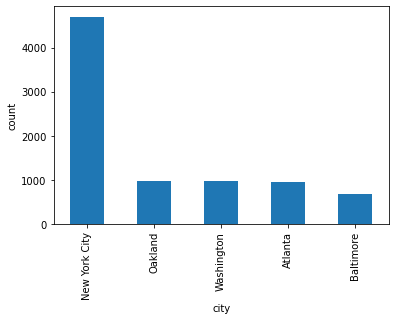

In [27]:
pd.value_counts(df['city']).plot.bar() #can i break this out by city 
plt.ylabel('count')
plt.xlabel('city')
plt.show()

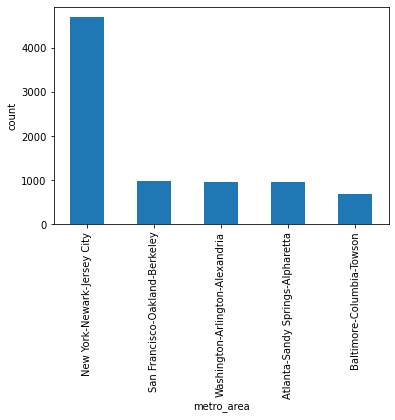

In [29]:
pd.value_counts(df['metro_area']).plot.bar() 
plt.ylabel('count')
plt.xlabel('metro_area')
plt.show()

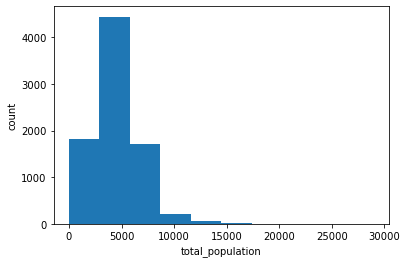

In [31]:
df['total_population'].plot.hist()   
plt.xlabel('total_population')
plt.ylabel('count')
plt.show() #bounded, can use minmax scaler

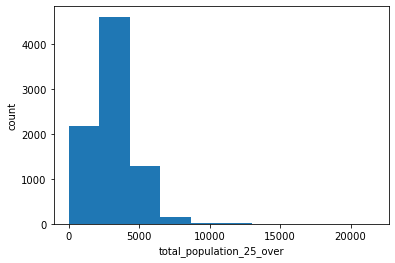

In [32]:
df['total_population_25_over'].plot.hist()   
plt.xlabel('total_population_25_over')
plt.ylabel('count')
plt.show() #bounded, can use minmax scaler

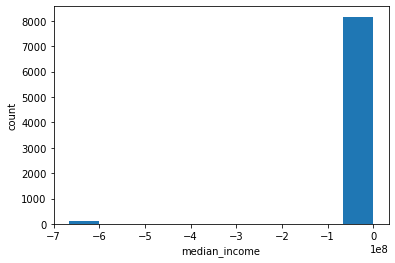

In [82]:
df['median_income'].plot.hist()   
plt.xlabel('median_income')
plt.ylabel('count')
plt.show() #graph looks wrong #mention there are outliers and make another histogram

In [45]:
df['median_home_value'].value_counts

<bound method IndexOpsMixin.value_counts of 0       345600.0
1       255000.0
2       250000.0
3       356600.0
4       298600.0
          ...   
8276    280800.0
8277    228700.0
8278    173000.0
8279    215800.0
8280    157100.0
Name: median_home_value, Length: 8281, dtype: float64>

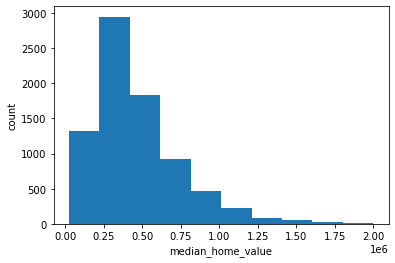

In [84]:
#df['median_home_value'].plot.hist(layout=(3, 6), figsize=(20, 10), sharey=False, sharex=False, bins=50)
df['median_home_value'].plot.hist(range=[25000, 2_000_000], bins = 10)
plt.xlabel('median_home_value')
plt.ylabel('count')
plt.show() #use minmax scaler

In [ ]:
#build a different dataframes into cities - search properties for histogram plots 
df['median_home_value'].plot.hist(range=[25000, 2_000_000], bins = 10)
plt.xlabel('median_home_value')
plt.ylabel('count')
plt.show() #use minmax scaler

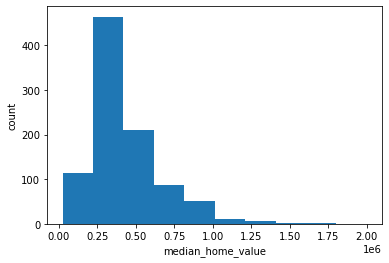

In [90]:
df_DC['median_home_value'].plot.hist(range=[25000, 2_000_000], bins = 10)
plt.xlabel('median_home_value')
plt.ylabel('count')
plt.show()

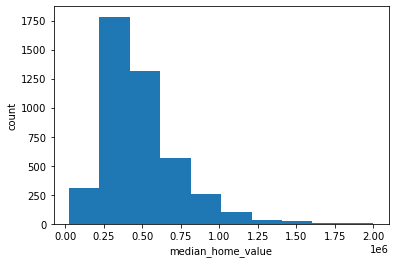

In [91]:
df_NYC['median_home_value'].plot.hist(range=[25000, 2_000_000], bins = 10)
plt.xlabel('median_home_value')
plt.ylabel('count')
plt.show()

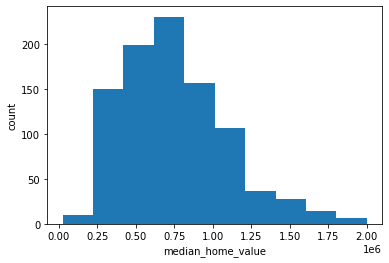

In [92]:
df_Oakland['median_home_value'].plot.hist(range=[25000, 2_000_000], bins = 10)
plt.xlabel('median_home_value')
plt.ylabel('count')
plt.show()

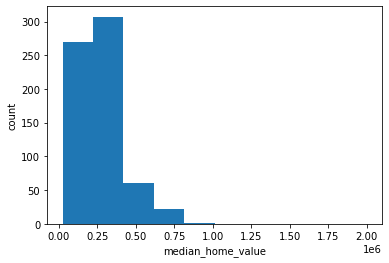

In [93]:
df_Baltimore['median_home_value'].plot.hist(range=[25000, 2_000_000], bins = 10)
plt.xlabel('median_home_value')
plt.ylabel('count')
plt.show()

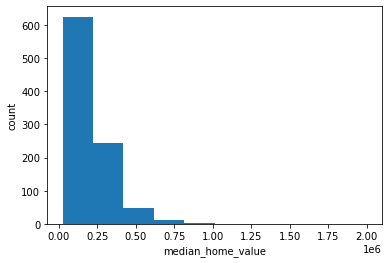

In [94]:
df_Atlanta['median_home_value'].plot.hist(range=[25000, 2_000_000], bins = 10)
plt.xlabel('median_home_value')
plt.ylabel('count')
plt.show()

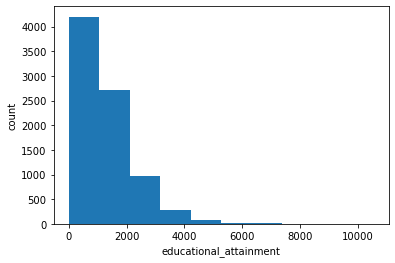

In [37]:
df['educational_attainment'].plot.hist()   
plt.xlabel('educational_attainment')
plt.ylabel('count')
plt.show()

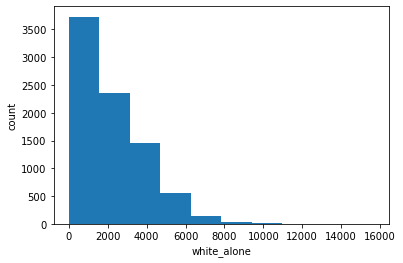

In [38]:
df['white_alone'].plot.hist()   
plt.xlabel('white_alone')
plt.ylabel('count')
plt.show()

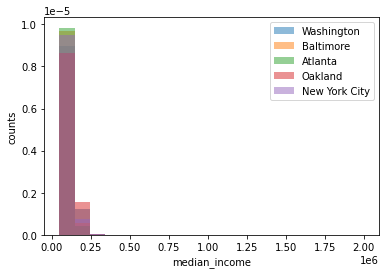

In [56]:
categories = df['city'].unique()
bin_range = (df['median_income'].min(),df['median_income'].max())

for c in categories:
    plt.hist(df[df['city']==c]['median_income'],alpha=0.5,label=c,range=[50000, 2000000],bins=20,density=True)
plt.legend()
plt.ylabel('counts')
plt.xlabel('median_income')
plt.show()

In [57]:
import seaborn as sns

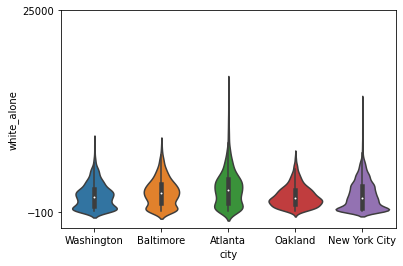

In [114]:
sns.violinplot(data = df, x = 'city', y = 'white_alone')
#plt.xticks([0,1],['0.0506801187398187', '-0.044641636506989'])
plt.yticks([-100, 25000])
plt.ylabel('white_alone')
plt.show()

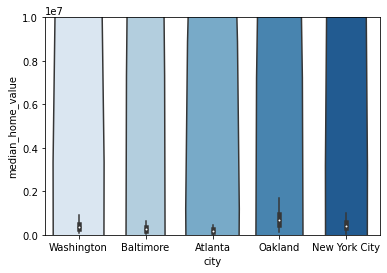

In [71]:
sns.violinplot( x=df["city"], y=df["median_home_value"], palette="Blues")
plt.ylim(0,10000000) 
plt.show()

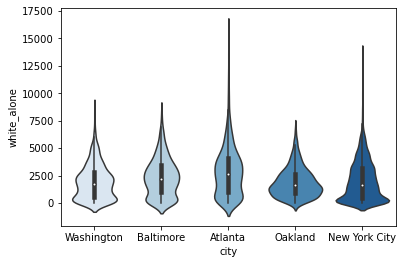

In [72]:
sns.violinplot( x=df["city"], y=df["white_alone"], palette="Blues")
#plt.ylim(0,10000000) 
plt.show()

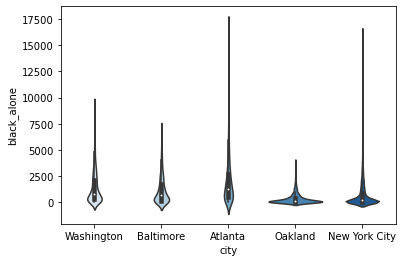

In [125]:
sns.violinplot( x=df["city"], y=df["black_alone"], palette="Blues")
#plt.ylim(0,10000000) 
plt.show()

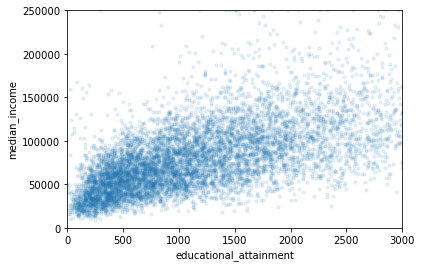

In [122]:
df.plot.scatter('educational_attainment','median_income',s=10,alpha=0.1) # alpha=0.1,s=10
plt.xlim(0, 3000)
plt.ylim(0, 250000)
plt.show()

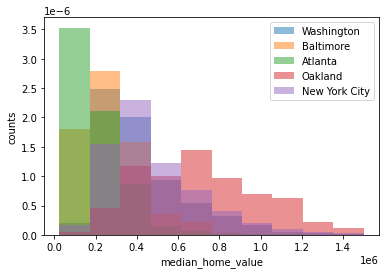

In [120]:
from matplotlib import pylab as plt

categories = df['city'].unique()
bin_range = (df['median_home_value'].min(),df['median_home_value'].max())

for c in categories:
    plt.hist(df[df['city']==c]['median_home_value'],alpha=0.5,label=c,range=[25000, 1_500_000],density=True)
plt.legend()
plt.ylabel('counts')
plt.xlabel('median_home_value')
plt.show()

In [78]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [80]:
y = df['median_home_value']
X = df.loc[:, df.columns != 'median_home_value'] 

In [81]:
groups = df["city"] #should we group by city - have to have some plots to prove that its not iid - show median home value - different means and stds.
#work on the histogram and check 
gss = GroupShuffleSplit(n_splits=10, train_size=.6, random_state=42)

for other_index, train_index in gss.split(X,y,groups): 
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_other = X.iloc[other_index]
    y_other = y.iloc[other_index]
    
    gss2 = GroupShuffleSplit(n_splits=1, train_size=.5, random_state=42)
    groups_other = X_other["city"]
    for test_index, validation_index in gss2.split(X_other, y_other, groups_other):
        X_val = X.iloc[validation_index]
        y_val = y.iloc[validation_index]
        X_test = X.iloc[test_index]
        y_test = y.iloc[test_index]
    
    std_ftrs = ['total_population', 'total_population_25_over', 'median_income',
                'educational_attainment', 'white_alone', 'black_alone', 'native_alone', 'asian_alone',
                'native_hawaiian_pacific_islander', 'some_other_race_alone', 'two_or_more', 'hispanic_or_latino']
  
    std_scaler = StandardScaler()
    std_fit = std_scaler.fit(X_train[std_ftrs])
    std_train = std_scaler.transform(X_train[std_ftrs])
    std_val = std_scaler.transform(X_val[std_ftrs])
    std_test = std_scaler.transform(X_test[std_ftrs]) 
    
    
    onehot_ftrs = ['city', 'metro_area']
    enc = OneHotEncoder(sparse=False,handle_unknown='ignore')  #initialize encoder
    enc.fit(X_train[onehot_ftrs])  #fit the training data
    onehot_train = enc.transform(X_train[onehot_ftrs]) #transform the training data
    onehot_val = enc.transform(X_val[onehot_ftrs]) #transform validation data
    onehot_test = enc.transform(X_test[onehot_ftrs]) #transform test data

In [74]:
print(df.dtypes)

geoid                                 int64
total_population                      int64
total_population_25_over            float64
median_income                       float64
median_home_value                   float64
educational_attainment              float64
white_alone                         float64
black_alone                         float64
native_alone                        float64
asian_alone                         float64
native_hawaiian_pacific_islander    float64
some_other_race_alone               float64
two_or_more                         float64
hispanic_or_latino                  float64
city                                 object
metro_area                           object
dtype: object
